In [1]:
from src.ai import generateImage, chatCompletion, getSpeechB64
from src.utils import displayB64Image, saveB64Image, extractSingleJsonString, extractSingleArray, displayText, displayAudio

In [2]:
prompt = """'Write an action-packed story about the given input with 5-7 distinct scenes, each one vividly bringing to life the characters and settings through descriptive language. Incorporate a mix of dialogue and narration to create a dynamic, immersive experience. Emphasize the actions and facial expressions of the characters, painting a picture with words that transports the reader to the world of the story. Use a variety of locations and scenery changes to keep the narrative engaging and unpredictable, seamlessly transitioning between scenes to maintain a sense of flow. Balance close-ups of the characters with wider shots of the environment, allowing the reader to see the bigger picture and appreciate the setting. Include moments of high visual impact and drama, where the action unfolds like a cinematic spectacle.
Do not include scene titles or other kind of metadata.
Respond with a valid JSON object, making sure to include the closing bracket. The object should only contain the key `story` with the full story as a string value.

Input: a superhero turns to a life of crime"""

completion = chatCompletion(prompt, max_tokens=1024, json=True)
story = extractSingleJsonString(completion, 'story')
# completion

# TODO
# assert that the text is long enough and not cut off
# i saw a library that could do more advanced stuff like this using llm, what was it?

displayText(story)
tts_audio  = getSpeechB64(story)
displayAudio(tts_audio)

In [3]:
prompt = """Given the following input story, Assistant's task is to extract descriptions of 4 scenes in the story to create images for.

Each scene should contextually be from the story but Assistant should expand on them to create vivid and detailed image descriptions.

Respond with a valid JSON object. The object should only contain the key `scenes` with an array of 4 strings as values.
Input Story: """
prompt = f"{prompt}\n```{story}```"
completion = chatCompletion(prompt, max_tokens=1024, json=True)
scenes = extractSingleArray(completion, 'scenes')
# completion
scenes

['A cityscape at dusk, with a lone figure standing atop a skyscraper, gazing out over the concrete jungle. The figure, Jack Harris, aka The Guardian, is silhouetted against the vibrant hues of the setting sun, his iconic suit a stark contrast to the dull, lifeless eyes that seem to hold a thousand unspoken words. The city lights twinkle like stars below, a reminder of the world he once protected, now a distant memory.',
 "A dark alleyway, dimly lit by a single flickering streetlight, casting long shadows across the wet pavement. Jack, now dressed in a black leather jacket and jeans, stands face to face with the notorious crime lord, Victor Vex. The air is thick with tension, the only sound the soft hum of the streetlight and the distant rumble of the city. Victor's eyes seem to bore into Jack's soul, a mixture of curiosity and suspicion etched on his face, as he extends a hand in a gesture of uneasy alliance.",
 "A high-stakes heist, set against the backdrop of a high-security museum. 

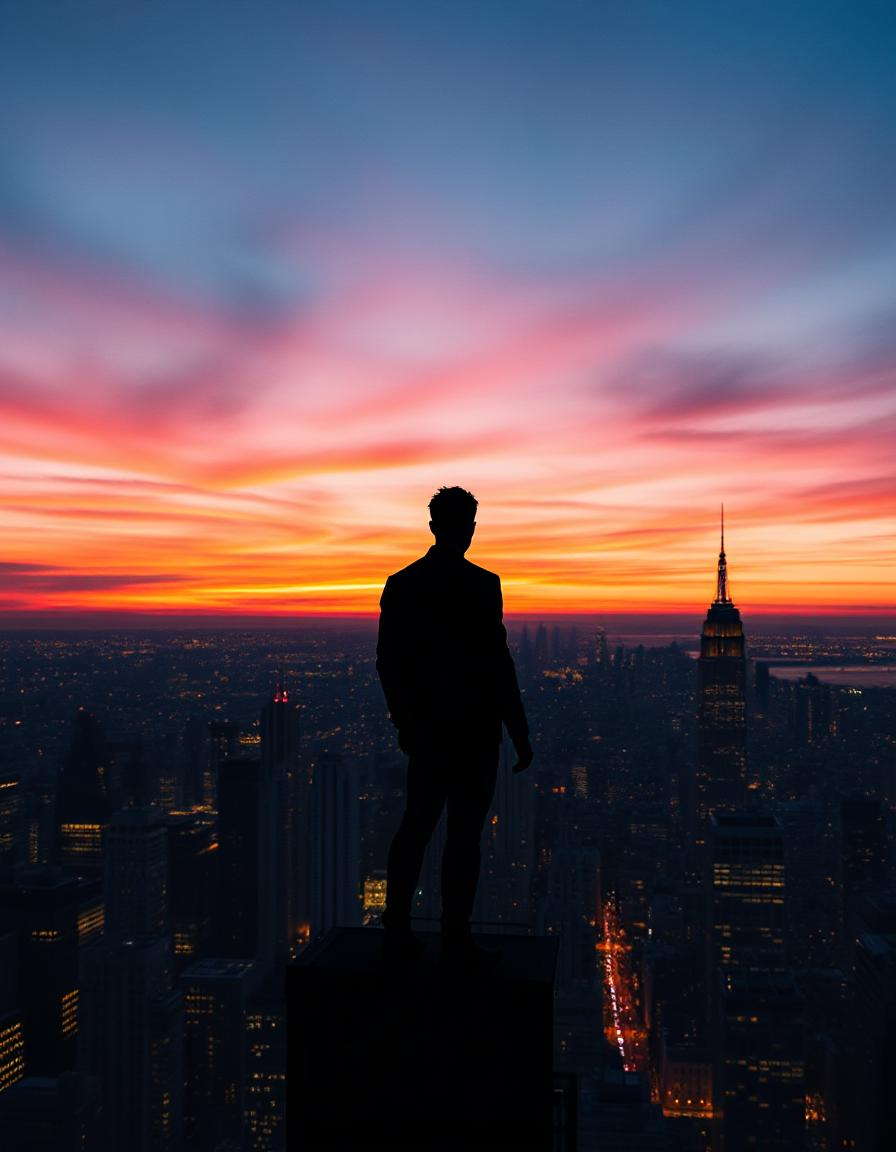

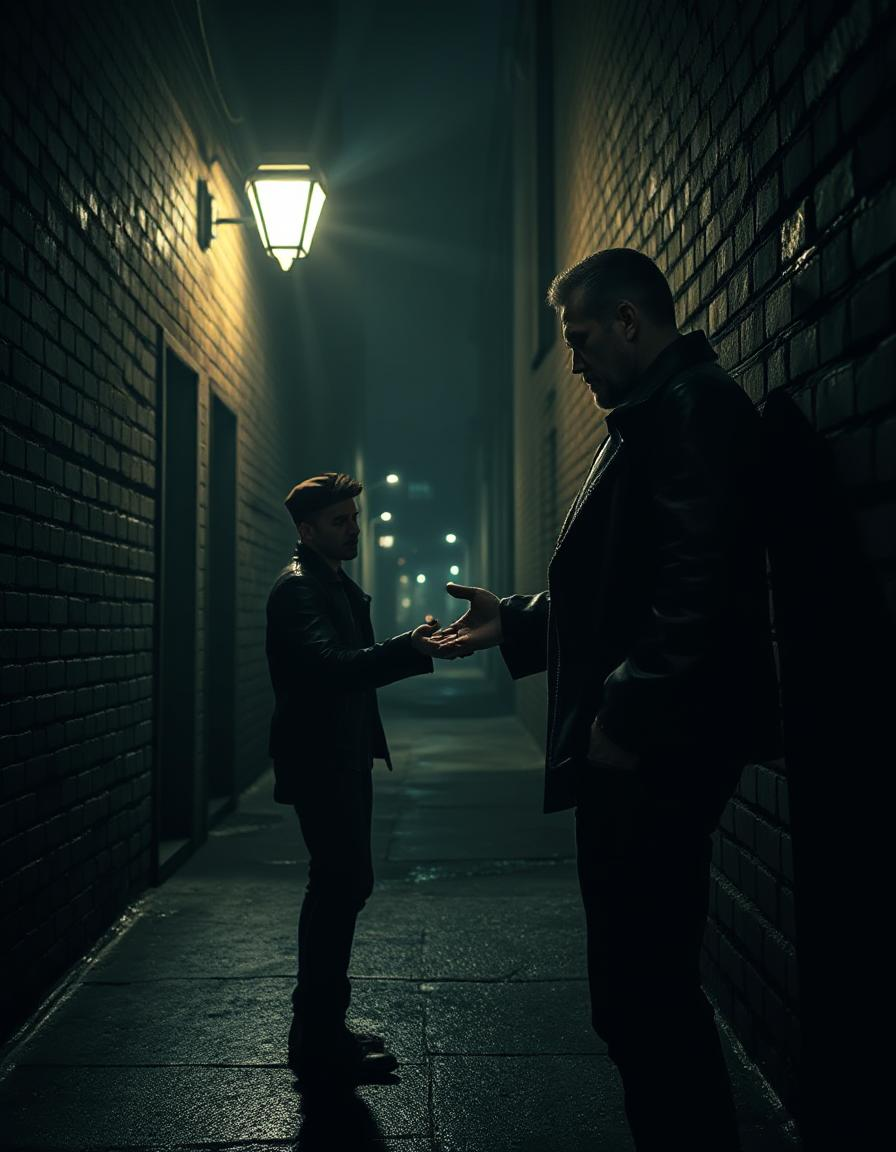

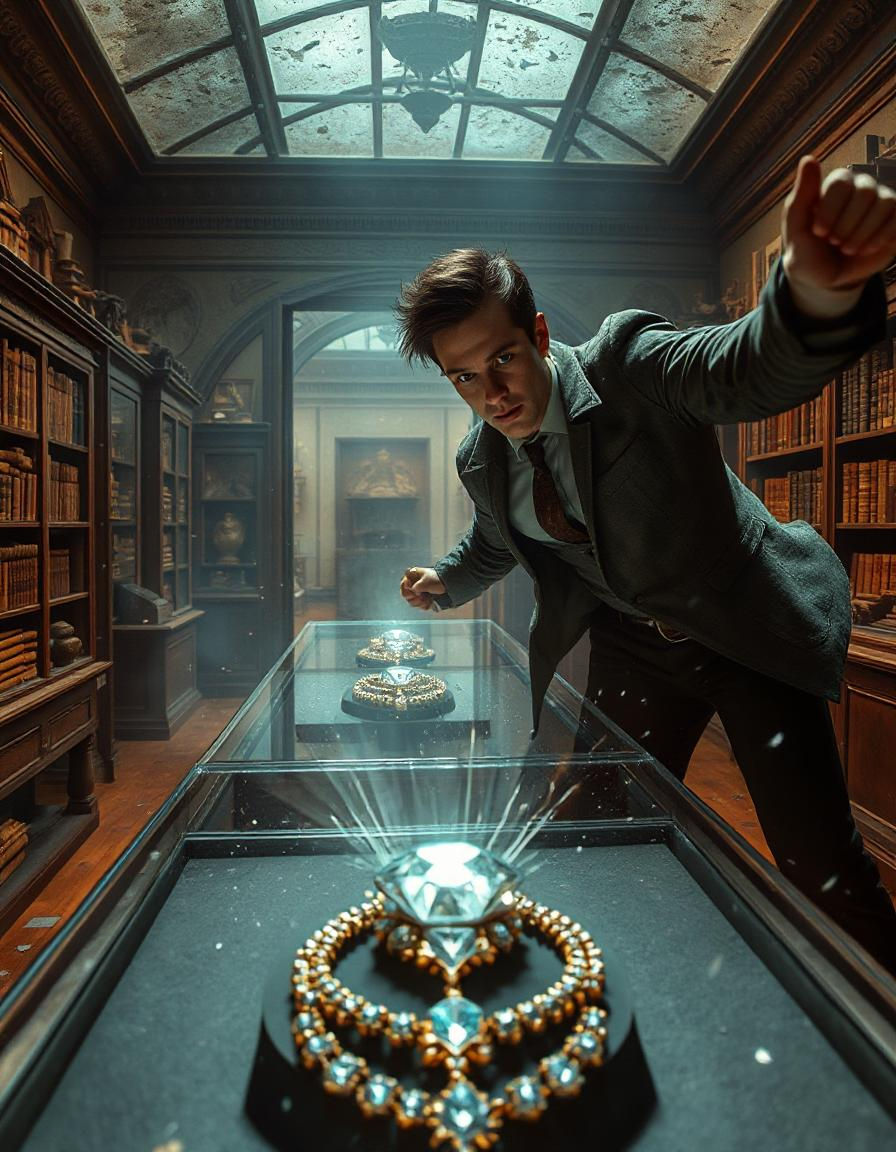

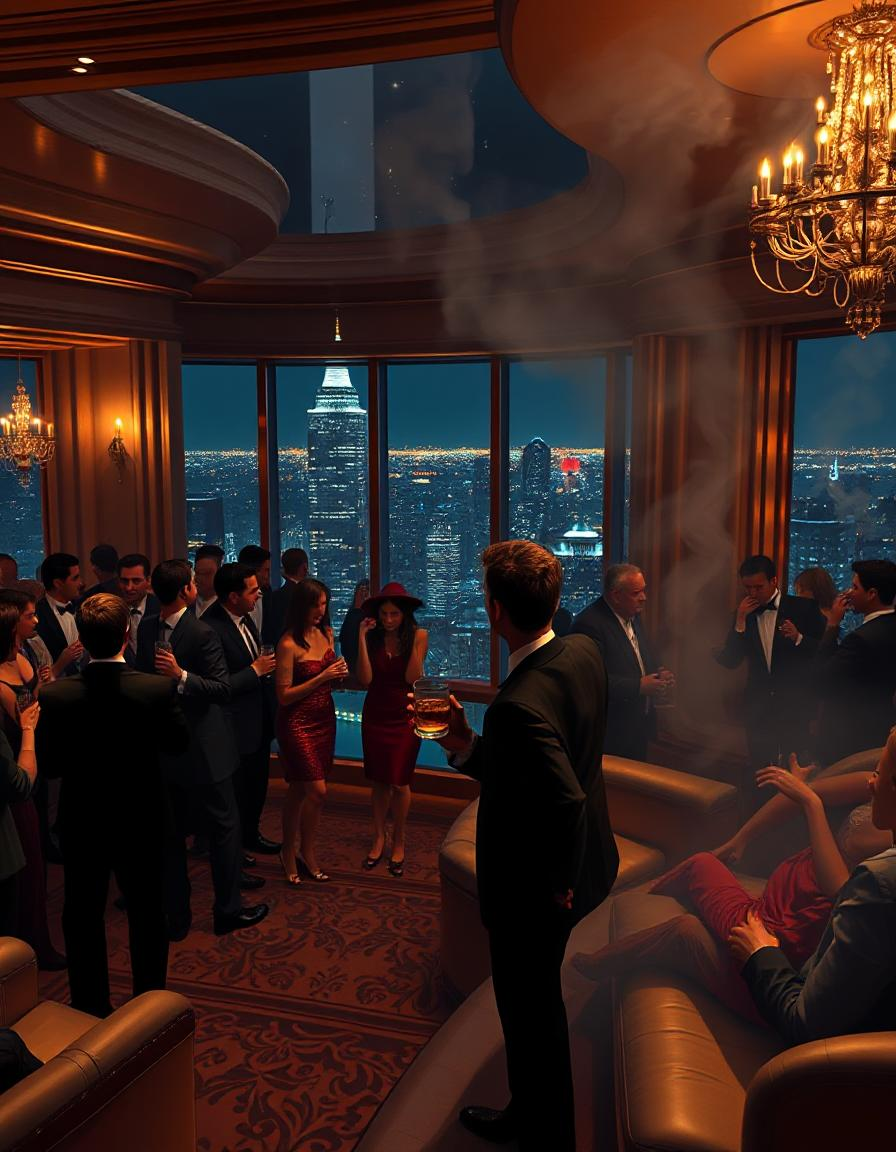

In [4]:
from time import sleep

steps = 2
for i, scene in enumerate(scenes):
	b64 = generateImage(scene, steps)
	displayB64Image(b64)
	sleep(1)